## FINETUNING da la derniere couche

In [ ]:
# import torch
# from torch import nn, optim
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader, random_split
# from transformers import ViTForImageClassification, ViTImageProcessor
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# import os

# # Fonction de collate personnalisée
# def custom_collate_fn(batch):
#     images, labels = zip(*batch)
#     return list(images), torch.tensor(labels)

# # Fonction pour obtenir la taille du modèle
# def get_model_size(model, temp_path="temp_model.pth"):
#     torch.save(model.state_dict(), temp_path)
#     size_mb = os.path.getsize(temp_path) / 1e6
#     os.remove(temp_path)
#     return size_mb


# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Dataset CIFAR-10
# transform = transforms.Resize((224, 224))
# train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# # Réduire le train set
# train_size = int(0.5 * len(train_dataset))
# train_subset, _ = random_split(train_dataset, [train_size, len(train_dataset) - train_size])

# train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
# test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

# # Charger ViT
# processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
# model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
# model.classifier = nn.Linear(model.config.hidden_size, 10)  # 10 classes pour CIFAR-10
# model.to(device)

# # Optimiseur et loss
# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# criterion = nn.CrossEntropyLoss()

# # Entraînement
# epochs = 5
# losses = []

# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
#         inputs = processor(images=images, return_tensors="pt").to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(**inputs)
#         loss = criterion(outputs.logits, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#     epoch_loss = running_loss / len(train_loader)
#     losses.append(epoch_loss)
#     print(f"Epoch {epoch+1}/{epochs} - Loss moyenne: {epoch_loss:.4f}")

# # Évaluation
# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for images, labels in tqdm(test_loader, desc="Evaluation"):
#         inputs = processor(images=images, return_tensors="pt").to(device)
#         outputs = model(**inputs)
#         preds = outputs.logits.argmax(dim=1)
#         correct += (preds == labels.to(device)).sum().item()
#         total += labels.size(0)

# accuracy = 100 * correct / total
# print(f"\nAccuracy sur CIFAR-10 : {accuracy:.2f}%")

# # Plot des pertes
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(losses)+1), losses, marker='o')
# plt.title("Courbe de perte durant le fine-tuning de la tête")
# plt.xlabel("Époch")
# plt.ylabel("Loss")
# plt.grid(True)
# plt.tight_layout()
# plt.savefig(os.path.join(save_path, "loss_curve.png"))  # sauvegarde en image
# plt.show()

# # Taille du modèle
# model_size = get_model_size(model)
# print(f"Taille du modèle : {model_size:.2f} MB")

2025-03-27 16:03:44.063703: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 16:03:45.193078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-27 16:03:45.508177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-27 16:03:45.593904: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-27 16:03:46.378959: I tensorflow/core/platform/cpu_feature_guar

Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [03:50<00:00,  3.40it/s]


Epoch 1/5 - Loss moyenne: 0.1513


Epoch 2/5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [03:47<00:00,  3.44it/s]


Epoch 2/5 - Loss moyenne: 0.0567


Epoch 3/5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [03:47<00:00,  3.43it/s]


Epoch 3/5 - Loss moyenne: 0.0419


Epoch 4/5:   1%|█▍                                                                                                                      | 9/782 [00:02<03:45,  3.44it/s]

## Enregistrer le modele head finetuned

In [2]:
# torch.save(model.state_dict(), "saved_models/vit_head_finetuned_full.pth")


## Réutiliser le modele depuis save dir

In [ ]:
# # Recharger l'architecture du modèle
# model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
# model.classifier = torch.nn.Linear(model.config.hidden_size, 10)  # Adapter à CIFAR-10

# # Charger les poids
# state_dict = torch.load("saved_models/vit_head_finetuned_full.pth")
# model.load_state_dict(state_dict)
# model.to(device).eval()

/scratch/11424982/ipykernel_2334467/3874483511.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("saved_models/vit_head_finetuned_full.pth")


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

## Taille du modèle

In [ ]:
# # Fonction pour afficher la taille
# def get_model_size(model, temp_path="temp_model.pth"):
#     torch.save(model.state_dict(), temp_path)
#     size_mb = os.path.getsize(temp_path) / 1e6
#     os.remove(temp_path)
#     return size_mb

# # Affichage
# model_size = get_model_size(model)
# print(f"Taille du modèle : {model_size:.2f} MB")

Taille du modèle : 343.31 MB


## FINETUNING des 3 dernieres couches

2025-03-28 10:57:05.119159: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 10:57:07.611838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-28 10:57:08.053018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-28 10:57:08.230540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 10:57:10.390939: I tensorflow/core/platform/cpu_feature_guar

Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [02:02<00:00,  6.38it/s]


Epoch 1/5 - Loss moyenne: 0.1438


Epoch 2/5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [02:01<00:00,  6.45it/s]


Epoch 2/5 - Loss moyenne: 0.0296


Epoch 3/5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [02:00<00:00,  6.47it/s]


Epoch 3/5 - Loss moyenne: 0.0077


Epoch 4/5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [02:00<00:00,  6.47it/s]


Epoch 4/5 - Loss moyenne: 0.0023


Epoch 5/5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [02:01<00:00,  6.45it/s]


Epoch 5/5 - Loss moyenne: 0.0023


Evaluation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.91it/s]


Accuracy sur CIFAR-10: 97.63%


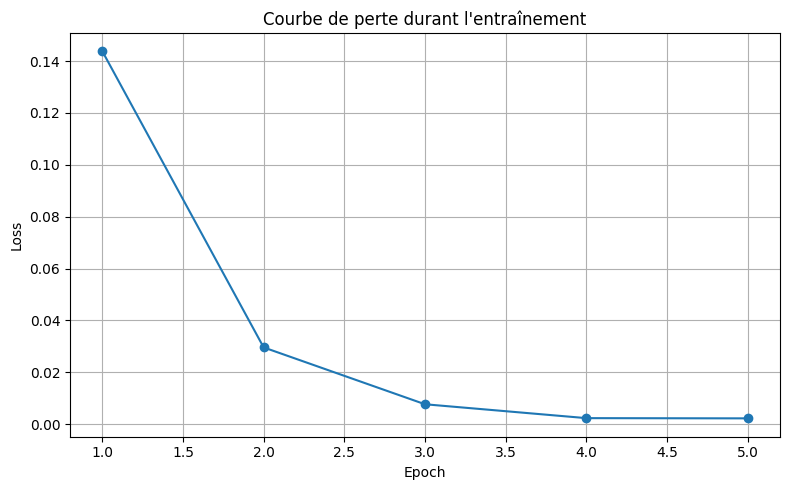

Taille du modèle sauvegardé : 343.31 MB


In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from transformers import ViTForImageClassification, ViTImageProcessor
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Fonction de collate personnalisée
def custom_collate_fn(batch):
    images, labels = zip(*batch)
    return list(images), torch.tensor(labels)

# Fonction utilitaire pour mesurer la taille du modèle
def get_model_size(model, temp_path="temp_model.pth"):
    torch.save(model.state_dict(), temp_path)
    size_mb = os.path.getsize(temp_path) / 1e6
    os.remove(temp_path)
    return size_mb

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset CIFAR-10
transform = transforms.Resize((224, 224))
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Réduction du dataset
total_train = len(train_dataset)
train_size = int(0.5 * total_train)
train_subset, _ = random_split(train_dataset, [train_size, total_train - train_size])

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

# Modèle ViT
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.classifier = nn.Linear(model.config.hidden_size, 10)

# Geler le backbone
for param in model.vit.parameters():
    param.requires_grad = False

# Unfreeze les 2 derniers blocs
for layer in model.vit.encoder.layer[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

model.to(device)

optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# ➤ Enregistrement des pertes
losses = []

# Entraînement
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs = processor(images=images, return_tensors="pt").to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss moyenne: {epoch_loss:.4f}")

# Évaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluation"):
        inputs = processor(images=images, return_tensors="pt").to(device)
        outputs = model(**inputs)
        preds = outputs.logits.argmax(dim=1)
        correct += (preds == labels.to(device)).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Accuracy sur CIFAR-10: {accuracy:.2f}%")

# ➤ Afficher la courbe de loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(losses)+1), losses, marker='o')
plt.title("Courbe de perte durant l'entraînement")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

size_mb = get_model_size(model)
print(f"Taille du modèle sauvegardé : {size_mb:.2f} MB")

## Enregistrer le modele head finetuned

In [3]:
from transformers import ViTForImageClassification, ViTImageProcessor

# Chemin de sauvegarde
save_path = "saved_models/vit_finetuned_hf"

# Sauvegarde du modèle complet
model.save_pretrained(save_path)

# Sauvegarde du processor
processor.save_pretrained(save_path)

print(f"Modèle et processor sauvegardés dans : {save_path}")

Modèle et processor sauvegardés dans : saved_models/vit_finetuned_hf


## QUANTIZATION

In [7]:
import torch
import time
import io
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import ViTImageProcessor, ViTForImageClassification
from tqdm import tqdm

# -------------------------------
# Fonction : taille mémoire du modèle
# -------------------------------
def get_model_size_in_memory(model):
    buffer = io.BytesIO()
    torch.save(model.state_dict(), buffer)
    return buffer.getbuffer().nbytes / 1e6  # en MB

# -------------------------------
# Fonction d’évaluation
# -------------------------------
def evaluate(model, processor, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Évaluation"):
            start = time.time()

            inputs = processor(images=images, return_tensors="pt").to(device)
            labels = labels.to(device)

            outputs = model(**inputs)
            preds = outputs.logits.argmax(dim=1)

            inference_times.append(time.time() - start)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = 100 * correct / total
    avg_inf_time = sum(inference_times) / len(inference_times)
    return acc, avg_inf_time

# -------------------------------
# Dataset CIFAR-10
# -------------------------------
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
transform = transforms.Resize((224, 224))
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

def custom_collate_fn(batch):
    images, labels = zip(*batch)
    return list(images), torch.tensor(labels)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

# -------------------------------
# Recharger le modèle fine-tuné
# -------------------------------
model_path = "saved_models/vit_finetuned_hf"

model = ViTForImageClassification.from_pretrained(
    model_path,
    ignore_mismatched_sizes=True
)
model.classifier = torch.nn.Linear(model.config.hidden_size, 10)

# -------------------------------
# Quantization dynamique propre
# -------------------------------
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# -------------------------------
# Évaluation sur CPU
# -------------------------------
device = torch.device("cpu")
quantized_model.to(device)

quantized_size = get_model_size_in_memory(quantized_model)
q_acc, q_time = evaluate(quantized_model, processor, test_loader, device)

# -------------------------------
# Affichage des résultats
# -------------------------------
print("\nStatistiques du modèle quantifié :")
print(f"Taille mémoire du modèle : {quantized_size:.2f} MB")
print(f"Accuracy sur CIFAR-10 : {q_acc:.2f}%")
print(f"Temps moyen d'inférence par batch : {q_time*1000:.2f} ms")


Files already downloaded and verified


Some weights of ViTForImageClassification were not initialized from the model checkpoint at saved_models/vit_finetuned_hf and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([10]) in the checkpoint and torch.Size([1000]) in the model instantiated
- classifier.weight: found shape torch.Size([10, 768]) in the checkpoint and torch.Size([1000, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Évaluation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [02:45<00:00,  1.89it/s]


Statistiques du modèle quantifié :
Taille mémoire du modèle : 88.53 MB
Accuracy sur CIFAR-10 : 6.83%
Temps moyen d'inférence par batch : 516.01 ms


## PRUNING

In [8]:
import torch
import torch.nn.utils.prune as prune
import time
import io
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import ViTImageProcessor
from tqdm import tqdm
from copy import deepcopy

# ------------------------------
# Fonction : taille en mémoire du modèle
# ------------------------------
def get_model_size_in_memory(model):
    buffer = io.BytesIO()
    torch.save(model.state_dict(), buffer)
    size_mb = buffer.getbuffer().nbytes / 1e6
    return size_mb

# ------------------------------
# Fonction d'évaluation
# ------------------------------
def evaluate(model, processor, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Évaluation", leave=False):
            start = time.time()

            inputs = processor(images=images, return_tensors="pt").to(device)
            labels = labels.to(device)

            outputs = model(**inputs)
            preds = outputs.logits.argmax(dim=1)

            inference_times.append(time.time() - start)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    avg_inference_time = sum(inference_times) / len(inference_times)
    return accuracy, avg_inference_time

# ------------------------------
# Fonction de pruning global
# ------------------------------
def apply_global_pruning(model, amount):
    parameters_to_prune = []
    for module in model.modules():
        if isinstance(module, torch.nn.Linear):
            parameters_to_prune.append((module, 'weight'))
    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=amount,
    )
    return model

# ------------------------------
# Calcul de la sparsité
# ------------------------------
def compute_sparsity(model):
    total_zeros = 0
    total_params = 0
    for module in model.modules():
        if isinstance(module, torch.nn.Linear):
            w = module.weight
            total_zeros += torch.sum(w == 0).item()
            total_params += w.numel()
    sparsity = 100.0 * total_zeros / total_params if total_params > 0 else 0.0
    return sparsity

# ------------------------------
# Préparation dataset
# ------------------------------
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
transform = transforms.Resize((224, 224))
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

def custom_collate_fn(batch):
    images, labels = zip(*batch)
    return list(images), torch.tensor(labels)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

# ------------------------------
# Ton modèle `model` doit déjà exister en mémoire (fine-tuné)
# ------------------------------
assert 'model' in globals(), "Le modèle `model` doit être défini en mémoire avant ce script."

device = torch.device("cpu")
pruning_levels = [0.1, 0.3, 0.5, 0.7, 0.9]

results = []

for amount in pruning_levels:
    print(f"\n==> Pruning {int(amount * 100)}%")

    pruned_model = deepcopy(model)
    pruned_model = apply_global_pruning(pruned_model, amount)
    pruned_model.to(device)

    sparsity = compute_sparsity(pruned_model)
    size_mb = get_model_size_in_memory(pruned_model)
    acc, inf_time = evaluate(pruned_model, processor, test_loader, device)

    results.append({
        "pruning": f"{int(amount * 100)}%",
        "sparsity": f"{sparsity:.2f}%",
        "size_mb": f"{size_mb:.2f}",
        "accuracy": f"{acc:.2f}%",
        "inference_time_ms": f"{inf_time * 1000:.2f}"
    })

# ------------------------------
# Résumé final
# ------------------------------
print("\nRésumé des modèles prunés :")
print(f"{'Pruning':<10} {'Sparsity':<10} {'Taille (MB)':<14} {'Accuracy':<10} {'Inférence (ms)':<15}")
for r in results:
    print(f"{r['pruning']:<10} {r['sparsity']:<10} {r['size_mb']:<14} {r['accuracy']:<10} {r['inference_time_ms']:<15}")


Files already downloaded and verified

==> Pruning 10%



==> Pruning 30%



==> Pruning 50%



==> Pruning 70%



==> Pruning 90%



Résumé des modèles prunés :
Pruning    Sparsity   Taille (MB)    Accuracy   Inférence (ms) 
10%        10.00%     683.10         7.45%      517.92         
30%        30.00%     683.10         6.80%      508.70         
50%        50.00%     683.10         10.00%     519.60         
70%        70.00%     683.10         10.00%     504.56         
90%        90.00%     683.10         10.00%     506.01         
